In [1]:
from torchvision.transforms.transforms import RandomHorizontalFlip
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
import torch.nn.functional as F

c:\Users\JSH\Desktop\MyGithub\paper_implementation\.paper_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from ResNet import ResNet

In [3]:
transformer = transforms.Compose(
                                 [transforms.Resize(256),
                                  transforms.RandomCrop(224),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ColorJitter(brightness=0.2,hue=0.2),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                 ])

train_data = datasets.CIFAR10(root='../.data', train=True, download=True, transform=transformer)
val_data = datasets.CIFAR10(root='../.data', train=False, download=True, transform=transformer)
x_train,y_train=train_data.data,train_data.targets

Files already downloaded and verified
Files already downloaded and verified


(32, 32, 3)

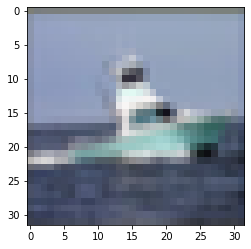

In [4]:
from random import randint
n = randint(1,len(train_data))
plt.imshow(x_train[n])
x_train[n].shape

In [5]:
BATCH_SIZE = 4
VAL_BATCH_SIZE = 4
train_loader = torch.utils.data.DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
val_loader = torch.utils.data.DataLoader(val_data,batch_size=VAL_BATCH_SIZE,shuffle=True,num_workers=1)
len(train_loader)

12500

In [11]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model = ResNet()
test = torch.rand(5,3,224,224)
model(test)

tensor([[5.5582e-07, 4.3086e-05, 5.9314e-08, 9.3735e-01, 6.2310e-02, 2.1079e-05,
         2.7667e-04, 8.0178e-07, 4.8256e-09, 1.3956e-06],
        [3.0535e-06, 6.2089e-06, 5.9484e-08, 9.7693e-01, 2.3031e-02, 7.7003e-06,
         1.6068e-05, 1.1418e-07, 1.8574e-09, 3.1522e-06],
        [4.9916e-06, 6.5801e-05, 1.7205e-07, 8.4393e-01, 1.5579e-01, 3.4308e-05,
         1.6284e-04, 1.0671e-06, 8.0375e-08, 9.0004e-06],
        [1.0324e-06, 3.9560e-05, 7.5419e-08, 9.6788e-01, 3.2060e-02, 1.1237e-06,
         1.2605e-05, 1.1981e-06, 3.5739e-09, 1.2741e-06],
        [8.8202e-07, 3.0469e-05, 4.8478e-08, 9.7962e-01, 2.0262e-02, 2.3189e-06,
         7.7319e-05, 1.3955e-07, 2.1010e-08, 1.7817e-06]],
       grad_fn=<ViewBackward0>)

In [7]:
for data,label in train_loader:
    data=data.to(device)
    print(data.shape)
#     print(data[0].shape,data[0])
#     img = data[0].numpy()
#     plt.imshow(np.transpose(img,(1,2,0))) # 3, 224, 224 -> 224, 224, 3으로 size 변경
# #     axs.axis('off')

    break

torch.Size([4, 3, 224, 224])


In [8]:
torch.cuda.empty_cache()

In [ ]:
learning_rate = 1e-4
momentum = 0.9
weight_decay = 0.0005
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

model.train()
epochs = 5
total_batch = len(train_loader)

for epoch in tqdm(range(epochs)):
  avg_loss = 0
  for img, label in train_loader:
    img = img.to(device)
    label = label.to(device)
    label = F.one_hot(label,num_classes=10)
    output = model(img)

    loss = criterion(output.type(torch.float32), label.type(torch.float32))
    optimizer.zero_grad()
    loss.requires_grad_(True)
    loss.backward()
    optimizer.step()

    avg_loss += loss/total_batch

  
  print('[Epoch: {:>4}] loss = {:>.9}'.format(epoch + 1, avg_loss))